<a href="https://colab.research.google.com/github/alracey/level4-project/blob/main/1d_piecewise_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapezoid

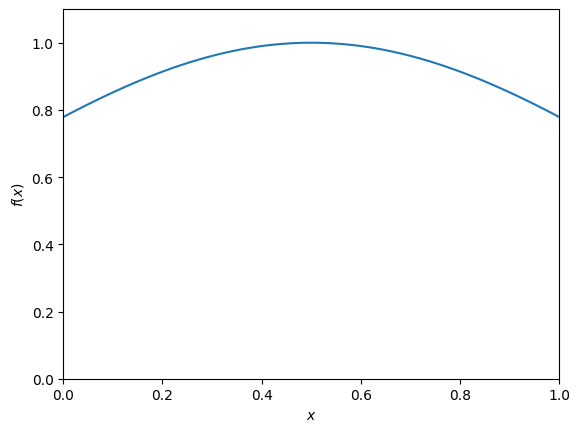

In [5]:
def f(x):
  return np.exp(-(x-0.5)**2)

xs = np.linspace(0, 1, 100)
f_evals = f(xs)
plt.plot(xs, f_evals)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.show()

In [12]:
K = 5    #number of bins
x_bins = np.linspace(0, 1, K+1)   #edges

y_initial = np.linspace(0, 1, K+1)    #(K+1) heights; (K-1) parameters
params_0 = y_initial[1:-2]
print(len(x_bins))

6


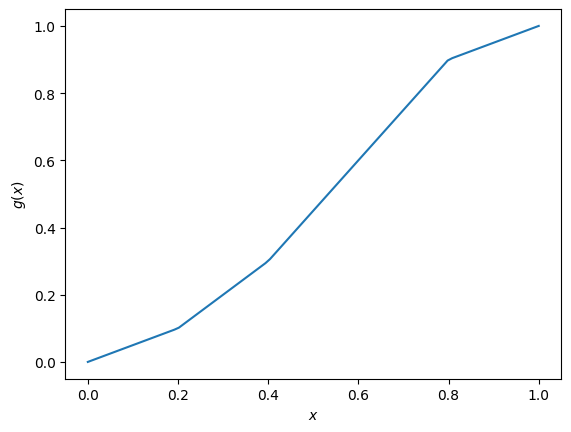

In [15]:
def g_new(x, y_params):
  #using given params, append 0 and 1 to the ends
  ys = np.concatenate(([0.0], y_params, [1.0]))

  #find the correct bin indices i for each x value
  i_values = np.minimum((x*K).astype(int), K-1) # Ensure indices are within the valid range [0, K-1]

  #compute the edges
  x_left = x_bins[i_values]
  x_right = x_bins[i_values + 1]
  y_left = ys[i_values]
  y_right = ys[i_values + 1]

  #compute the linear mappings for all x

  return y_left + ((y_right - y_left) / (x_right - x_left)) * (x - x_left)

test = g_new(xs, np.array([0.1, 0.3, 0.6, 0.9]))
plt.plot(xs, test)
plt.xlabel("$x$")
plt.ylabel("$g(x)$")
plt.show()